## **Examen de cinturón AML – Opción C**

**Descripción del examen:**
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. 

El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

**Dataset:**

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

**Instrucciones:**

**1. Exploración y preprocesamiento de datos:**
* Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
* Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

**2. Análisis no supervisado:**

Selecciona un enfoque de análisis no supervisado: **K-means o PCA.**
* K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
* PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

**3. Modelado con MLP:**
* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

**4. Evaluación del modelo:**
* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

**5. Discusión y análisis:**
* Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
* Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

**6. Entrega final:**
  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

**Inicio**

In [10]:
import pandas as pd

# Carga de datos
data_path = "../data/train.csv"
df_train = pd.read_csv(data_path)

In [11]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [27]:
print(df_train.tail())  # Últimas 5 filas

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
7347          0.043616          0.060410          0.210795  .

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [13]:
print(df_train.shape)

(7352, 563)


In [14]:
# Mostrar los nombres de todas las columnas
print(df_train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [15]:
import pandas as pd

# Carga de datos
data_path = "../data/test.csv"
df_test = pd.read_csv(data_path)

In [16]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [26]:
print(df_test.tail())  # Últimas 5 filas

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2942         -0.148775         -0.232057          0.185361  .

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [18]:
print(df_test.shape)

(2947, 563)


In [19]:
# Mostrar los nombres de todas las columnas
print(df_test.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [20]:
# Comparar columnas directamente
if list(df_train.columns) == list(df_test.columns):
    print("Las columnas de df_train y df_test son iguales.")
else:
    print("Las columnas de df_train y df_test son diferentes.")


Las columnas de df_train y df_test son iguales.


In [21]:
# Ver la distribución de las clases en df_train y df_test
print(df_train['Activity'].value_counts())  # Distribución de clases en entrenamiento
print(df_test['Activity'].value_counts())  # Distribución de clases en prueba


Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [23]:
# Ver el resumen estadístico
print("Resumen estadístico de las columnas numéricas:")
print(df_train.describe())


Resumen estadístico de las columnas numéricas:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0

In [24]:

# Revisar tipos de datos
print("Tipos de datos en el dataset:")
print(df_train.dtypes)

Tipos de datos en el dataset:
tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


 **Identificar las variables sensoriales**

In [25]:
# Identificar columnas sensoriales
sensor_columns = [col for col in df_train.columns if "Body" in col or "Acc" in col or "Gyro" in col]

# Ver las primeras columnas sensoriales
print("Columnas sensoriales:")
print(sensor_columns[:10])  # Mostrar solo las primeras 10


Columnas sensoriales:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [29]:
# Filtrar columnas con valores nulos
columnas_nulas = df_train.columns[df_train.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df_train[columnas_nulas].isnull().sum()
print(valores_nulos)


Series([], dtype: float64)


In [31]:
print(columnas_nulas.tolist())

[]


In [34]:
# Mostrar las filas duplicadas
filas_duplicadas = df_train[df_train.duplicated()]
print(filas_duplicadas)

# Contar cuántas filas duplicadas existen
cantidad_duplicadas = df_train.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicadas}")


Empty DataFrame
Columns: [tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z, tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z, tBodyAcc-mad()-X, tBodyAcc-mad()-Y, tBodyAcc-mad()-Z, tBodyAcc-max()-X, tBodyAcc-max()-Y, tBodyAcc-max()-Z, tBodyAcc-min()-X, tBodyAcc-min()-Y, tBodyAcc-min()-Z, tBodyAcc-sma(), tBodyAcc-energy()-X, tBodyAcc-energy()-Y, tBodyAcc-energy()-Z, tBodyAcc-iqr()-X, tBodyAcc-iqr()-Y, tBodyAcc-iqr()-Z, tBodyAcc-entropy()-X, tBodyAcc-entropy()-Y, tBodyAcc-entropy()-Z, tBodyAcc-arCoeff()-X,1, tBodyAcc-arCoeff()-X,2, tBodyAcc-arCoeff()-X,3, tBodyAcc-arCoeff()-X,4, tBodyAcc-arCoeff()-Y,1, tBodyAcc-arCoeff()-Y,2, tBodyAcc-arCoeff()-Y,3, tBodyAcc-arCoeff()-Y,4, tBodyAcc-arCoeff()-Z,1, tBodyAcc-arCoeff()-Z,2, tBodyAcc-arCoeff()-Z,3, tBodyAcc-arCoeff()-Z,4, tBodyAcc-correlation()-X,Y, tBodyAcc-correlation()-X,Z, tBodyAcc-correlation()-Y,Z, tGravityAcc-mean()-X, tGravityAcc-mean()-Y, tGravityAcc-mean()-Z, tGravityAcc-std()-X, tGravityAcc-std()-Y, tGravityAcc-std()-Z, t

relaciones

In [40]:
columnas = df_train.columns.tolist()
print(columnas)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

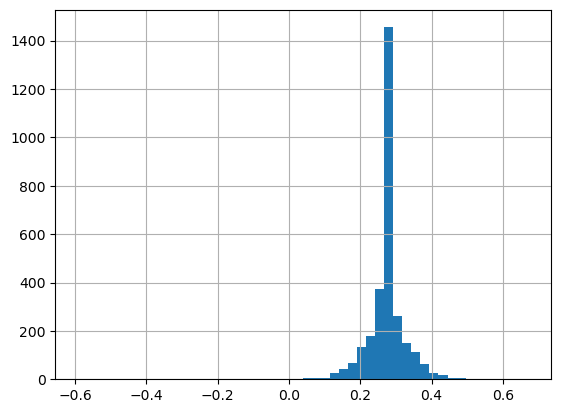

In [49]:
import matplotlib.pyplot as plt

df['tBodyAcc-mean()-X'].hist(bins=50)
plt.show()


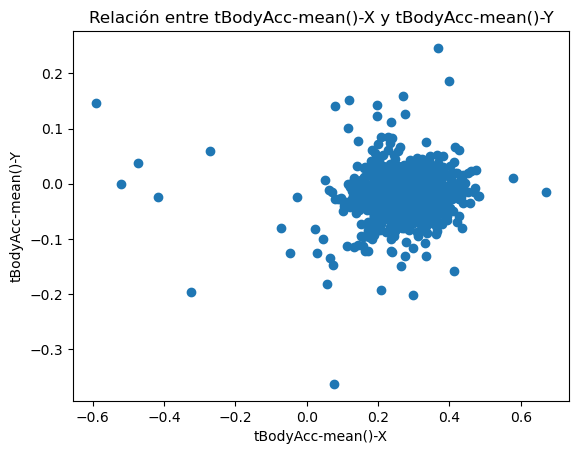

In [50]:
import matplotlib.pyplot as plt

# Ejemplo de un gráfico de dispersión entre tBodyAcc-mean()-X y tBodyAcc-mean()-Y
plt.scatter(df['tBodyAcc-mean()-X'], df['tBodyAcc-mean()-Y'])
plt.title('Relación entre tBodyAcc-mean()-X y tBodyAcc-mean()-Y')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()


In [52]:
# Filtrar columnas con valores nulos
columnas_nulas = df_train.columns[df_train.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df_train[columnas_nulas].isnull().sum()
print(valores_nulos)

Series([], dtype: float64)


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por la columna 'activity' y calcular la media de tBodyAcc-mean()-X
activity_means = df.groupby('activity')['tBodyAcc-mean()-X'].mean()

# Crear gráfico de barras
activity_means.plot(kind='bar')
plt.title('Media de tBodyAcc-mean()-X por Actividad')
plt.xlabel('Actividad')
plt.ylabel('Media de tBodyAcc-mean()-X')
plt.show()


KeyError: 'activity'

In [35]:
# Filtrar las columnas que contienen las palabras "acc", "x", "y", "z"
columnas_acceleracion = df_train.filter(regex='acc|x|y|z', axis=1)
print(columnas_acceleracion)


      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322 

In [38]:
# Suponiendo que hay una columna de actividades llamada 'actividad' o 'label'
df_actividades = df_train[['Activity', *columnas_acceleracion.columns]]
print(df_actividades.head())


   Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0  STANDING           0.288585          -0.020294          -0.132905   
1  STANDING           0.278419          -0.016411          -0.123520   
2  STANDING           0.279653          -0.019467          -0.113462   
3  STANDING           0.279174          -0.026201          -0.123283   
4  STANDING           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091         -0.983403         -0.990675         -0.997099   
4         -0.998139         -0.980817         -0.990482         -0.998321   

   tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.983185      

In [39]:
# Acceder a las columnas relacionadas con aceleración
aceleracion_columns = [col for col in df.columns if 'tBodyAcc' in col]

# Acceder a las columnas relacionadas con la actividad
actividad_column = ['Activity']

# Mostrar los nombres de las columnas de aceleración
print(aceleracion_columns)

# Mostrar los nombres de las columnas de actividad
print(actividad_column)


['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 

In [48]:
# Filtrar las columnas de aceleración (ajusta estos nombres según tu dataset)
columnas_acceleracion = ['acc_x', 'acc_y', 'acc_z']  # Ajusta según las columnas que tengas
X = df_train[columnas_acceleracion]


KeyError: "None of [Index(['acc_x', 'acc_y', 'acc_z'], dtype='object')] are in the [columns]"

**normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.**

In [41]:
from sklearn.preprocessing import StandardScaler

# Separar características y etiquetas
X_train = df_train.drop(columns=["Activity"])
y_train = df_train["Activity"]

X_test = df_test.drop(columns=["Activity"])
y_test = df_test["Activity"]

# Normalizar los datos (media = 0, desviación estándar = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**K-means**

Centroides de los clusters:
[[ 3.79602077e-02  1.94272670e-02  1.24682940e-02 ... -5.36682921e-01
  -2.43932149e-01  6.84641031e-02]
 [-1.43359120e-01 -9.89533921e-02 -6.39261726e-02 ...  5.89050741e-01
   4.84411705e-01  7.41193121e-02]
 [ 2.10762704e-02  1.58754662e-01  7.78584576e-02 ...  2.61689817e-01
   2.78410399e-01  2.21042267e-02]
 [-2.95807795e-02 -3.90222349e-02 -3.24316032e-04 ... -1.43251128e+00
  -1.78885870e+00  8.07940081e-02]
 [ 4.16622111e-02 -2.22546800e-02 -1.03897530e-01 ...  5.30650676e-01
   7.10242367e-01 -1.37491089e-01]
 [ 1.19414071e-01 -2.34740238e-02  8.50547646e-03 ...  5.85298721e-01
   4.77736099e-01 -2.39907230e-01]]


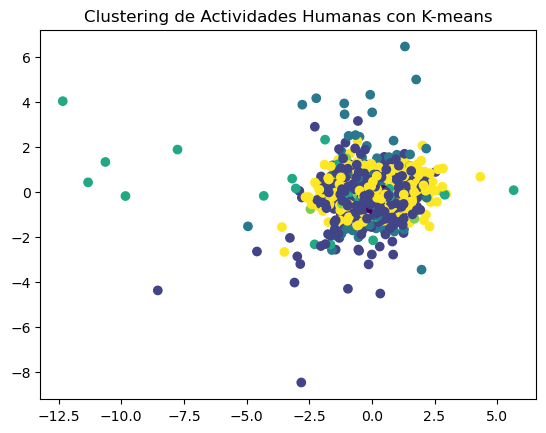

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-means
kmeans = KMeans(n_clusters=6, random_state=42)  # Suponiendo 6 actividades diferentes
kmeans.fit(X_train_scaled)

# Mostrar los centroides
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

# Predecir los clusters para los datos de prueba
y_pred = kmeans.predict(X_test_scaled)

# Graficar el resultado (si las dimensiones lo permiten)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis')
plt.title('Clustering de Actividades Humanas con K-means')
plt.show()


 Evaluación del modelo

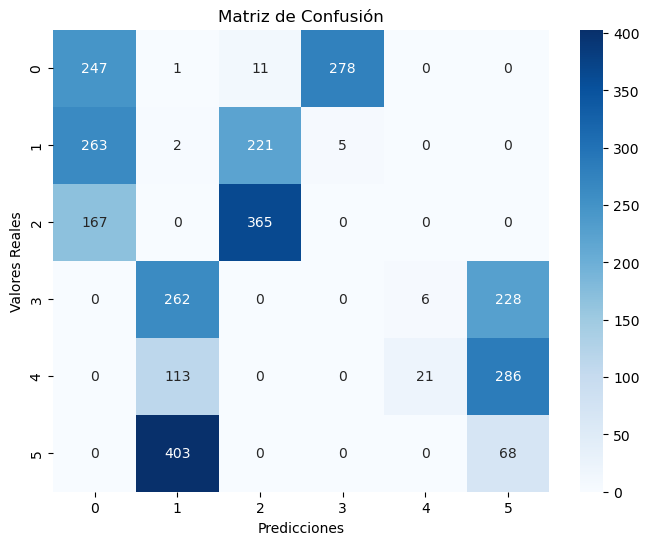

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Supongamos que y_test y y_pred son tus etiquetas reales y predichas
# Asegúrate de que ambos sean del mismo tipo

# Convertir las etiquetas a cadenas (si están en formato numérico o mixto)
y_test = y_test.astype(int)  # Si prefieres trabajar con int
y_pred = y_pred.astype(int)  # Asegúrate de que ambos sean del mismo tipo

# Si las etiquetas son categorías y prefieres usar números, puedes usar LabelEncoder
# Le damos el fit_transform a y_test y transformamos y_pred con el mismo encoder

# Crear un LabelEncoder para convertir las etiquetas a números
le = LabelEncoder()

# Ajustar el LabelEncoder a las etiquetas de y_test
y_test = le.fit_transform(y_test)

# Transformar y_pred con el mismo LabelEncoder
y_pred = le.transform(y_pred)

# Ahora que las etiquetas están en el mismo formato (números), calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


Ajuste de los clusters

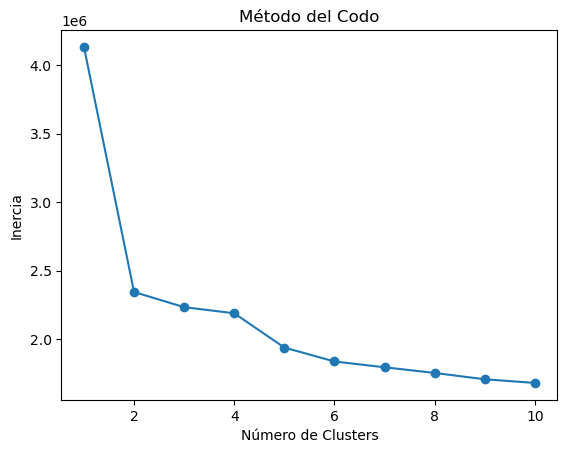

In [47]:
# Método del codo para elegir el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()
